<a href="https://colab.research.google.com/github/olgatar999/DataAnalysis-St/blob/main/Mini_Analytics_Olga_Tar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Titan America — Mini Analytics (Colab Demo)
*Prepared by Olga Tar*

This short notebook demonstrates how I'd approach **pricing/margin visibility** and **S&OP support** for a building materials company (cement, aggregates, ready-mix, fly ash). It uses small, **synthetic** yet realistic datasets to keep the demo fast and clear.

**What you'll see:**
1. Cement price trend (Florida) with YoY delta and a simple moving average.
2. S&OP funnel metrics (Quotes → Orders) with conversion rate and backlog trend.
3. Margin visibility by product line (cement, aggregates, ready-mix, fly ash).
4. Quick ETL/data-quality example before reporting.


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: f'{x:,.2f}')



## 1) Cement Price Trend — Florida (Synthetic Example)

Goal: Illustrate how I'd give fast **pricing visibility** and highlight **YoY changes** that can feed into pricing strategy and margin reviews.


In [4]:

# Synthetic monthly average cement price in Florida ($/ton)
dates = pd.date_range('2023-01-01', '2025-10-01', freq='MS')
np.random.seed(42)

# Start around 134 and add mild seasonality + drift
base = 134 + np.linspace(0, 12, len(dates)) * 0.3
season = 1.5 * np.sin(np.linspace(0, 6*np.pi, len(dates)))
noise = np.random.normal(0, 0.8, len(dates))
price = base + season + noise

cement = pd.DataFrame({'date': dates, 'fl_price_per_ton': price})
cement['yoy_price'] = cement['fl_price_per_ton'].pct_change(12) * 100
cement['ma_3'] = cement['fl_price_per_ton'].rolling(3).mean()

cement.tail()


,date,fl_price_per_ton,yoy_price,ma_3
29,2025-06-01,135.80,0.08,136.54
30,2025-07-01,135.31,0.90,135.75
31,2025-08-01,137.50,3.03,136.20
32,2025-09-01,136.67,0.50,136.49
33,2025-10-01,136.75,1.08,136.97


from matplotlib import pyplot as plt
_df_0['fl_price_per_ton'].plot(kind='hist', bins=20, title='fl_price_per_ton')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['yoy_price'].plot(kind='hist', bins=20, title='yoy_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ma_3'].plot(kind='hist', bins=20, title='ma_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='fl_price_per_ton', y='yoy_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='yoy_price', y='ma_3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['fl_price_per_ton']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('fl_price_per_ton')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['yoy_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('yoy_price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['ma_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('ma_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['fl_price_per_ton'].plot(kind='line', figsize=(8, 4), title='fl_price_per_ton')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['yoy_price'].plot(kind='line', figsize=(8, 4), title='yoy_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['ma_3'].plot(kind='line', figsize=(8, 4), title='ma_3')
plt.gca().spines[['top', 'right']].set_visible(False)

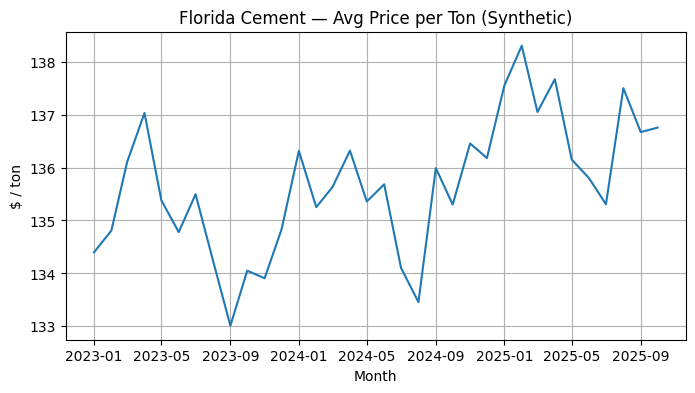

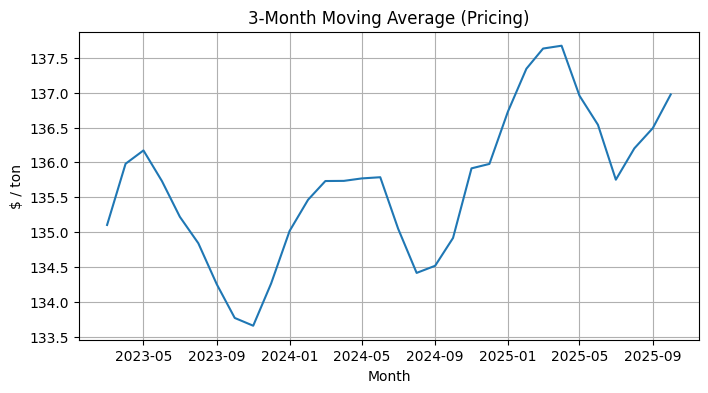

In [5]:

# Line: price
plt.figure(figsize=(8,4))
plt.plot(cement['date'], cement['fl_price_per_ton'])
plt.title('Florida Cement — Avg Price per Ton (Synthetic)')
plt.xlabel('Month')
plt.ylabel('$ / ton')
plt.grid(True)
plt.show()

# Line: 3-month moving average
plt.figure(figsize=(8,4))
plt.plot(cement['date'], cement['ma_3'])
plt.title('3-Month Moving Average (Pricing)')
plt.xlabel('Month')
plt.ylabel('$ / ton')
plt.grid(True)
plt.show()


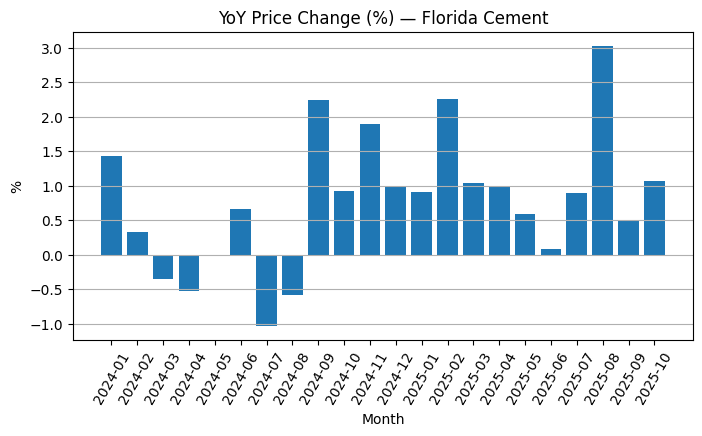

Most recent YoY change (%): 1.08


In [7]:

# YoY view (bar) — months that have YoY available
yoy = cement.dropna(subset=['yoy_price']).copy()

plt.figure(figsize=(8,4))
plt.bar(yoy['date'].dt.to_period('M').astype(str), yoy['yoy_price'])
plt.title('YoY Price Change (%) — Florida Cement')
plt.xlabel('Month')
plt.ylabel('%')
plt.xticks(rotation=60)
plt.grid(True, axis='y')
plt.show()

print('Most recent YoY change (%):', round(yoy['yoy_price'].iloc[-1], 2))



**Takeaway:** This shows how I'd quickly put pricing in context (trend + smoothing + YoY) to inform price adjustments and margin targets in leadership reviews.



## 2) S&OP Funnel — Quotes → Orders, Conversion & Backlog

Goal: Provide **Sales & Operations Planning** visibility: demand signal from quotes, conversion rate to orders, and backlog trend.


In [ ]:

sop = pd.DataFrame({
    'month': pd.date_range('2024-01-01', '2025-10-01', freq='MS')
})

# Synthetic quotes and orders
rng = np.random.default_rng(7)
sop['quotes'] = rng.integers(380, 560, size=len(sop))
# Conversion rate gently trending up with noise
conv_base = np.linspace(0.22, 0.30, len(sop)) + rng.normal(0, 0.01, len(sop))
sop['orders'] = (sop['quotes'] * conv_base).round().astype(int)

# Backlog synthetic (days)
sop['backlog_days'] = rng.integers(6, 18, size=len(sop))

# ASP ($/order) & simple revenue proxy
sop['asp'] = rng.normal(145, 6, len(sop)).clip(130, 165)
sop['revenue_proxy'] = sop['orders'] * sop['asp']

# Conversion
sop['conversion_rate'] = (sop['orders'] / sop['quotes']).replace([np.inf, -np.inf], np.nan)

sop.tail()


In [ ]:

# Plot quotes vs. orders
plt.figure(figsize=(8,4))
plt.plot(sop['month'], sop['quotes'], label='Quotes')
plt.plot(sop['month'], sop['orders'], label='Orders')
plt.title('S&OP Funnel: Quotes → Orders')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Conversion rate
plt.figure(figsize=(8,4))
plt.plot(sop['month'], sop['conversion_rate'])
plt.title('Conversion Rate (Quotes → Orders)')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.grid(True)
plt.show()

# Backlog trend
plt.figure(figsize=(8,4))
plt.plot(sop['month'], sop['backlog_days'])
plt.title('Backlog (Days)')
plt.xlabel('Month')
plt.ylabel('Days')
plt.grid(True)
plt.show()



**Takeaway:** This structure lets leadership see **demand vs. supply** at a glance, plus conversion efficiency and backlog pressure — all inputs to **S&OP** decisions.



## 3) Pricing & Margin Visibility by Product Line

Goal: Illustrate a **margin view** across product lines (cement, aggregates, ready-mix, fly ash). These are synthetic numbers to demo the workflow.


In [8]:

products = ['Cement', 'Aggregates', 'Ready-Mix', 'Fly Ash']
np.random.seed(11)

margin = pd.DataFrame({
    'product': np.repeat(products, 6),
    'month': list(pd.date_range('2025-05-01', periods=6, freq='MS')) * len(products)
})
# Synthetic unit price and unit cost
margin['unit_price'] = np.select(
    [margin['product'].eq('Cement'),
     margin['product'].eq('Aggregates'),
     margin['product'].eq('Ready-Mix'),
     margin['product'].eq('Fly Ash')],
    [145, 22, 128, 40], default=100
) + np.random.normal(0, 3, len(margin))

margin['unit_cost'] = margin['unit_price'] * np.select(
    [margin['product'].eq('Cement'),
     margin['product'].eq('Aggregates'),
     margin['product'].eq('Ready-Mix'),
     margin['product'].eq('Fly Ash')],
    [0.68, 0.62, 0.74, 0.58], default=0.7
) + np.random.normal(0, 1.5, len(margin))

margin['gross_margin_%'] = ((margin['unit_price'] - margin['unit_cost']) / margin['unit_price']) * 100
margin.head()


,product,month,unit_price,unit_cost,gross_margin_%
0,Cement,2025-05-01,150.25,103.11,31.37
1,Cement,2025-06-01,144.14,98.13,31.92
2,Cement,2025-07-01,143.55,98.71,31.23
3,Cement,2025-08-01,137.04,92.22,32.70
4,Cement,2025-09-01,144.98,98.32,32.18


from matplotlib import pyplot as plt
_df_12['unit_price'].plot(kind='hist', bins=20, title='unit_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['unit_cost'].plot(kind='hist', bins=20, title='unit_cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['gross_margin_%'].plot(kind='hist', bins=20, title='gross_margin_%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='unit_price', y='unit_cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='unit_cost', y='gross_margin_%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['unit_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('unit_price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['unit_cost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('unit_cost')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['gross_margin_%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('gross_margin_%')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'month'}, axis=1)
              .sort_values('month', ascending=True))
  xs = counted['month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_21['unit_price'].plot(kind='line', figsize=(8, 4), title='unit_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['unit_cost'].plot(kind='line', figsize=(8, 4), title='unit_cost')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['gross_margin_%'].plot(kind='line', figsize=(8, 4), title='gross_margin_%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:

# Average margin by product (bar)
avg_margin = margin.groupby('product', as_index=False)['gross_margin_%'].mean()

plt.figure(figsize=(6,4))
plt.bar(avg_margin['product'], avg_margin['gross_margin_%'])
plt.title('Average Gross Margin % by Product (Synthetic)')
plt.xlabel('Product')
plt.ylabel('Gross Margin %')
plt.grid(True, axis='y')
plt.show()

avg_margin.sort_values('gross_margin_%', ascending=False)



**Takeaway:** This is the foundation for **pricing & profitability** discussions — which products/regions warrant price moves or cost actions.



## 4) ETL & Data Quality — Quick Example

Goal: Show a simple pattern for **clean → validate → document** before loading into BI tools (Power BI/Tableau).


In [10]:

raw = pd.DataFrame({
    'Month ': ['2025-06', '2025-07', '2025-08', None],
    'Product ': ['cement', 'Aggregates ', 'ready-mix', 'fly ash '],
    'Unit Price($)': [147.2, 21.9, None, 39.8],
    'Unit Cost($)': [99.3, 13.9, 96.2, 22.7]
})

# 1) Trim/rename columns
clean = raw.copy()
clean.columns = [c.strip().lower().replace(' ', '_').replace('($)', '') for c in clean.columns]

# 2) Trim strings & standardize product names
clean['product'] = clean['product'].str.strip().str.title()
clean['month'] = pd.to_datetime(clean['month'], errors='coerce')

# 3) Handle missing values
clean['unit_price'] = pd.to_numeric(clean['unit_price'], errors='coerce')
clean['unit_cost'] = pd.to_numeric(clean['unit_cost'], errors='coerce')
clean = clean.dropna(subset=['month', 'product', 'unit_price', 'unit_cost'])

# 4) Derive metrics
clean['gross_margin_%'] = ((clean['unit_price'] - clean['unit_cost']) / clean['unit_price']) * 100

clean


,month,product,unit_price,unit_cost,gross_margin_%
0,2025-06-01,Cement,147.20,99.30,32.54
1,2025-07-01,Aggregates,21.90,13.90,36.53


from matplotlib import pyplot as plt
clean['unit_price'].plot(kind='hist', bins=20, title='unit_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
clean['unit_cost'].plot(kind='hist', bins=20, title='unit_cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
clean['gross_margin_%'].plot(kind='hist', bins=20, title='gross_margin_%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
clean.groupby('product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
clean.plot(kind='scatter', x='unit_price', y='unit_cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
clean.plot(kind='scatter', x='unit_cost', y='gross_margin_%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['unit_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = clean.sort_values('month', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('product')):
  _plot_series(series, series_name, i)
  fig.legend(title='product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('unit_price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['unit_cost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = clean.sort_values('month', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('product')):
  _plot_series(series, series_name, i)
  fig.legend(title='product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('unit_cost')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'month'}, axis=1)
              .sort_values('month', ascending=True))
  xs = counted['month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = clean.sort_values('month', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('product')):
  _plot_series(series, series_name, i)
  fig.legend(title='product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['gross_margin_%']
  ys = series['unit_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = clean.sort_values('gross_margin_%', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('product')):
  _plot_series(series, series_name, i)
  fig.legend(title='product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('gross_margin_%')
_ = plt.ylabel('unit_price')

from matplotlib import pyplot as plt
clean['unit_price'].plot(kind='line', figsize=(8, 4), title='unit_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
clean['unit_cost'].plot(kind='line', figsize=(8, 4), title='unit_cost')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
clean['gross_margin_%'].plot(kind='line', figsize=(8, 4), title='gross_margin_%')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(clean['product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(clean, x='unit_price', y='product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(clean['product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(clean, x='unit_cost', y='product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(clean['product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(clean, x='gross_margin_%', y='product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


**Result:** The dataset is standardized, key fields are validated, and derived KPIs are ready for visualization in **Power BI/Tableau** or for export to a **data mart**.



---

### How this supports the Titan America role
- **Pricing & margin visibility:** trend, YoY, and product-line margin view.
- **S&OP support:** quotes→orders conversion and backlog insight.
- **Quote-to-cash efficiency:** clean inputs and consistent KPIs enable faster decision-making.
- **Data governance:** explicit cleaning and transformations documented in code.

> In a real engagement, I'd replace synthetic data with Titan America's sources (ERP/CRM/SCM), add region/plant granularity, and automate refreshes (Power BI + scheduled pipelines).
